<a href="https://colab.research.google.com/github/masoom-alam/FMML_2024/blob/main/M2L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

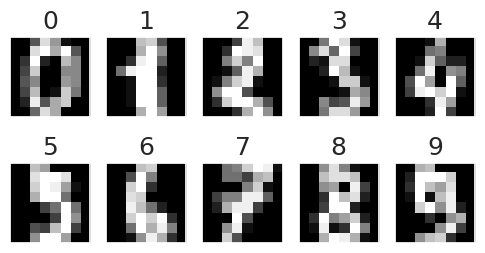

In [3]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [4]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [5]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

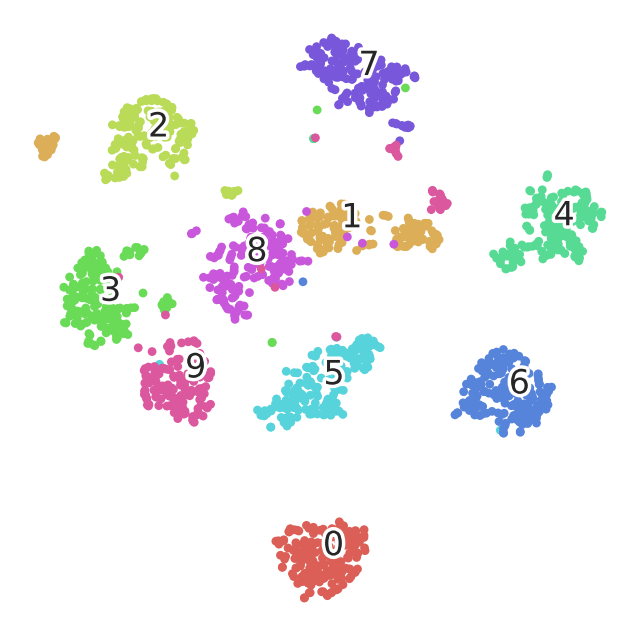

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59fb1e650>)

In [6]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

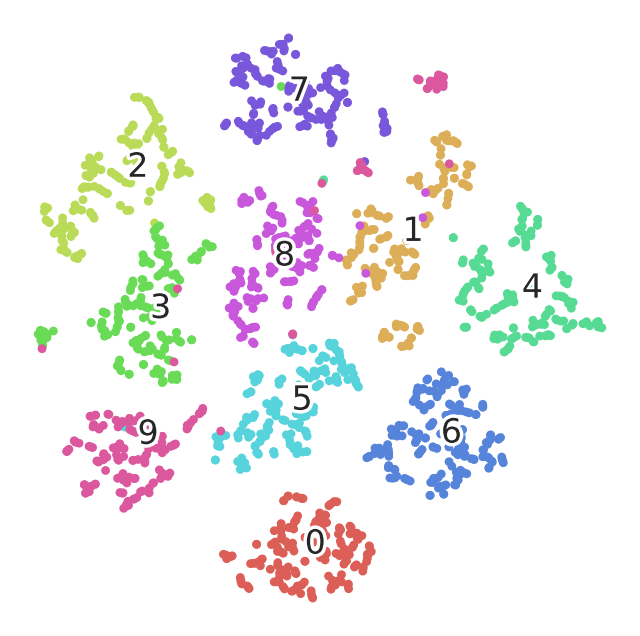

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59fb1f220>)

In [7]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

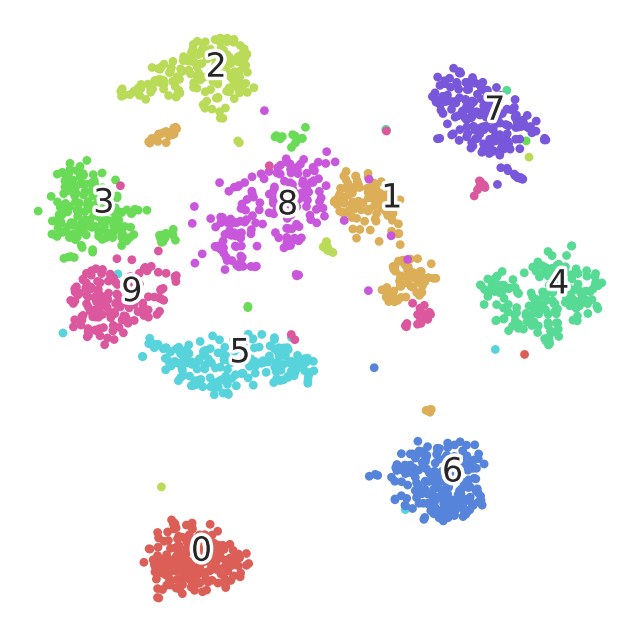

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59da65570>)

In [8]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


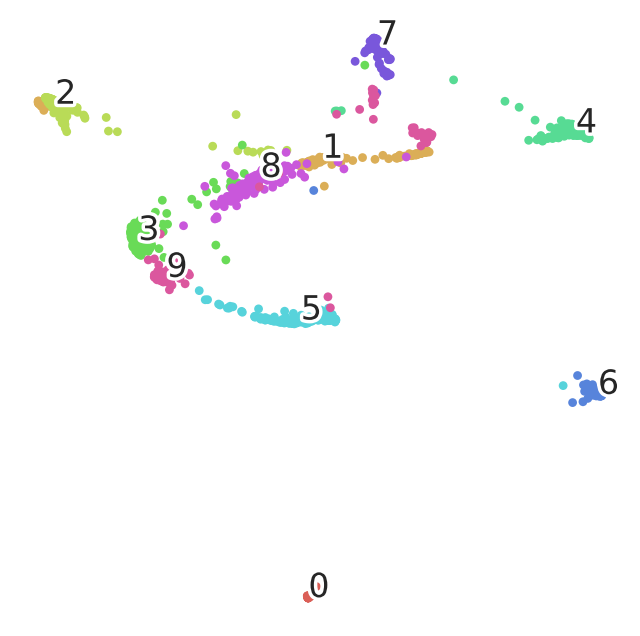

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59daba410>)

In [9]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


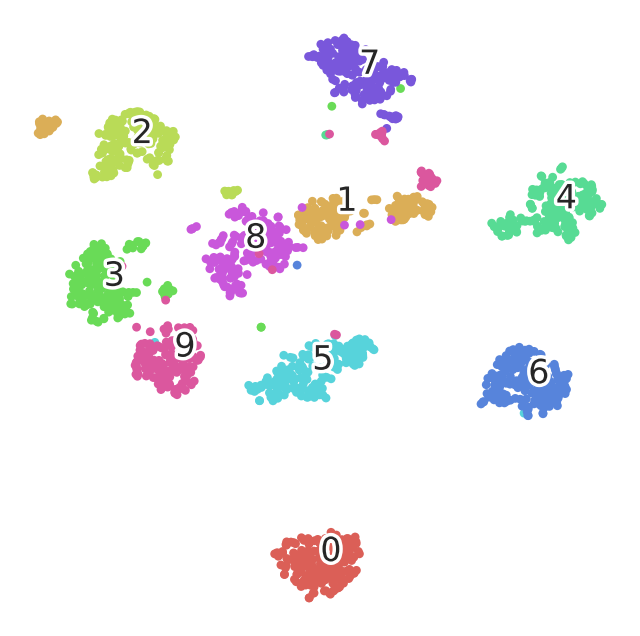

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59c14f970>)

In [10]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

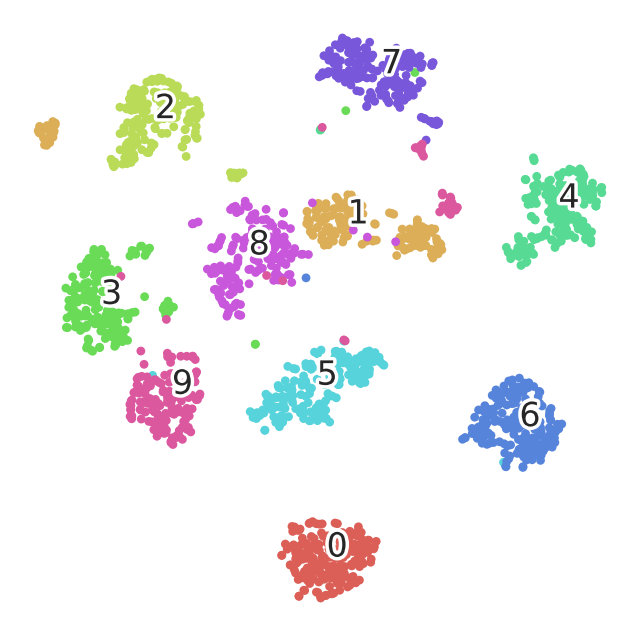

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59c1cbee0>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

#EXERCISE

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


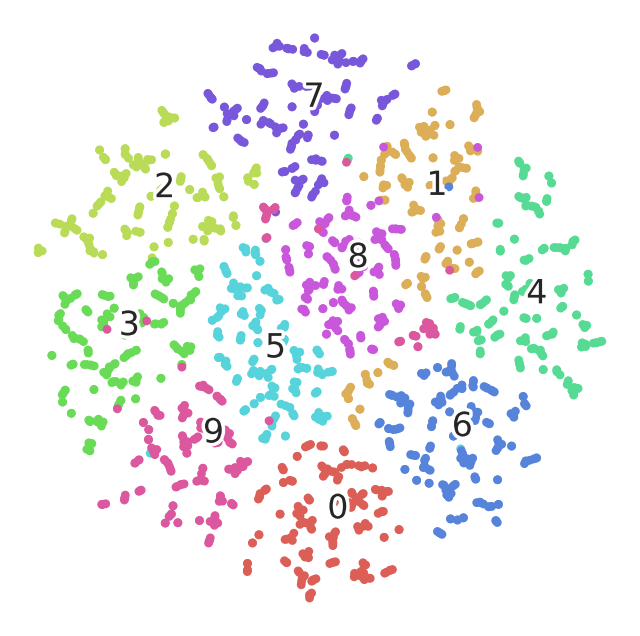

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59c014df0>)

In [12]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


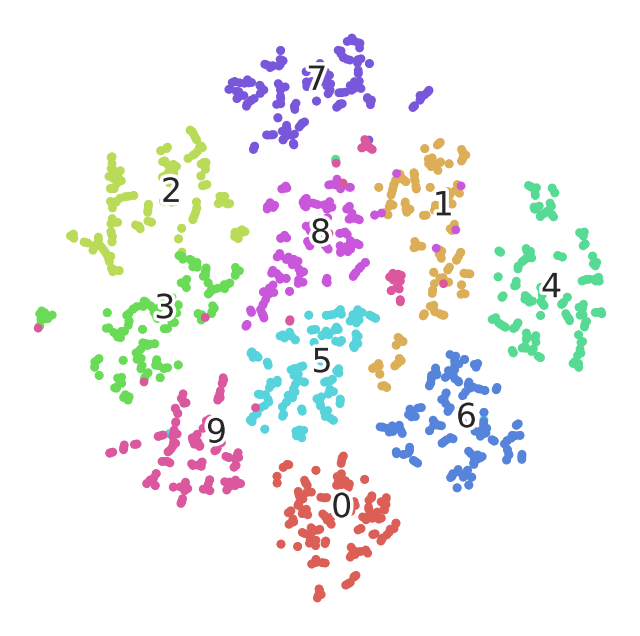

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59c0c14b0>)

In [13]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 3
number_iterations = 2000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


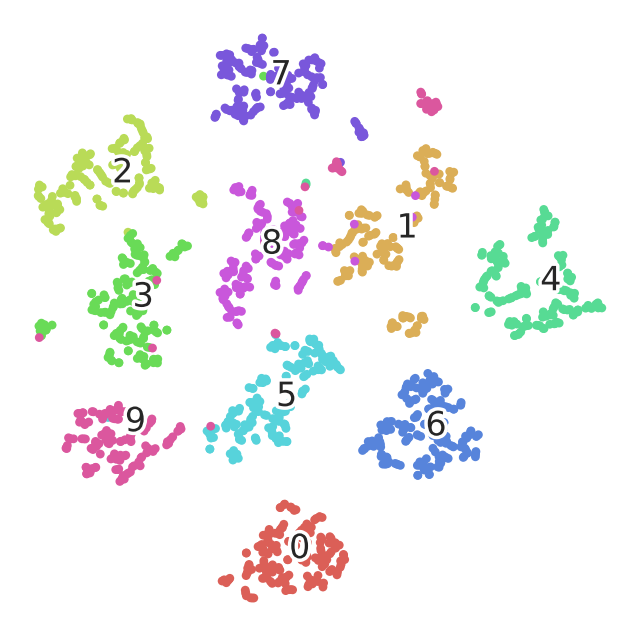

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7aa59bf11690>)

In [14]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 5
number_iterations = 5000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?
Pointers:

a. Which of the two algorithms is linear and which one is non-linear?
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?
d. Can you comment on which one of the two is computationally more expensive?

A)Linear vs. Non-linear
PCA:
Linear: PCA is a linear dimensionality reduction technique that projects the data onto a linear subspace. It identifies the directions (principal components) that maximize variance in the data.
t-SNE:
Non-linear: t-SNE is a non-linear technique that captures complex relationships in the data by modeling pairwise similarities, which allows it to capture intricate structures in high-dimensional data.

B)Non-linearity and Data Representation
The non-linearity in t-SNE helps it capture complex patterns and structures in data that are not well-represented by linear methods like PCA. This is especially useful for high-dimensional datasets where local relationships between data points (such as clusters) are essential to understanding the data's underlying structure. For example, t-SNE can effectively handle data with non-linear separations, making it particularly suited for tasks like visualizing high-dimensional embeddings or clustering.

C)Preservation of Relationships
PCA:
PCA tends to preserve the global structure of the data by keeping points that are further apart in higher dimensions also far apart in lower dimensions. It focuses on maximizing variance and may not adequately represent the local structure.
t-SNE:
t-SNE primarily focuses on preserving local neighborhoods, meaning it aims to keep similar points close together in the lower-dimensional space. As a result, t-SNE can distort global distances to maintain local relationships, which can lead to different clusters being closer together than they are in high-dimensional space.


D)PCA:
Generally less computationally expensive,t-SNE:
More computationally expensive

#2)How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

Computational Complexity
Exact Method:
The time complexity for the exact t-SNE algorithm is
O
(
N^2
)
, where
N
is the number of data points. This is because the method computes pairwise similarities between all points in the dataset, which results in a quadratic scaling with the number of samples.
Barnes-Hut Approximation:
The Barnes-Hut implementation reduces the time complexity to
O(NlogN). This is achieved by approximating the pairwise similarities using a tree structure (specifically, a quadtree or a k-d tree), which helps in efficiently grouping distant points and reduces the number of distance calculations.

Runtime Scaling with Dataset Size
As the number of samples (data points) increases, the computational cost grows significantly, particularly with the exact method. This means that for large datasets (e.g., thousands or millions of samples), the exact method becomes infeasible in terms of both memory and runtime.
The Barnes-Hut method is much more scalable for larger datasets but still becomes slower as the number of samples increases, although the logarithmic factor mitigates some of the growth in runtime.

Runtime Scaling with Dimensionality
t-SNE also has a dependency on the original dimensionality of the data, although its primary concern is with the number of samples.
The initial steps of t-SNE involve calculating pairwise distances between points, which scales with the number of dimensions, but this effect is generally less pronounced compared to the number of samples. The complexity of the pairwise distance computations is
O(N^2
 ⋅d) for the exact method, where
d
d is the number of dimensions. However, the overall complexity is still dominated by the
N^2
  term.

#3)What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)

1. Sensitivity to Hyperparameters
Perplexity: The choice of perplexity can significantly influence the resulting visualization. A low perplexity focuses more on local structure, which might lead to fragmented clusters, while a high perplexity can oversmooth the data and merge distinct clusters. Finding the right perplexity often requires experimentation.
Number of Iterations: t-SNE can converge at different rates depending on the dataset. Insufficient iterations may lead to suboptimal embeddings, while too many iterations may not provide substantial additional benefit but will increase computational cost.

2.Non-deterministic Results
Random Initialization: t-SNE uses random initialization for its optimization process. This means that running the algorithm multiple times with the same data can yield different results, making it challenging to reproduce findings consistently. Using a fixed random seed can help mitigate this, but variability is still a concern.

 Computational Cost
Time and Memory Intensive: t-SNE, especially with the exact method, can be computationally expensive and memory-intensive for large datasets. This limits its applicability to smaller datasets or necessitates the use of approximations like the Barnes-Hut method, which may still struggle with very large datasets.


Distortion of Global Structure
Loss of Global Relationships: t-SNE primarily focuses on preserving local structure, which can distort global relationships. This means that while local clusters may be well represented, the overall arrangement of these clusters may not accurately reflect their relationships in the original high-dimensional space. This can lead to misleading interpretations of the data.
